In [254]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-energy-consumption/World Energy Consumption.csv
/kaggle/input/data-dictionary/owid-energy-codebook.csv


In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [256]:
# Uncomment the next code cell if the following module is not already present in your system

In [257]:
pip install itables 

Note: you may need to restart the kernel to use updated packages.



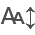

In [258]:
import itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

## <span style = "color:gold"> Today we are using this World Energy Data collected and collated by https://ourworldindata.org/energy</span>

> Our World in Data (OWID) is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality.

>It is a project of the Global Change Data Lab, a registered charity in England and Wales. The research team is based at the University of Oxford.

In [259]:
data = pd.read_csv("/kaggle/input/world-energy-consumption/World Energy Consumption.csv")

In [260]:
data.head(10)

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   
5  ASEAN (Ember)  2005      NaN         NaN  NaN                      NaN   
6  ASEAN (Ember)  2006      NaN         NaN  NaN                      NaN   
7  ASEAN (Ember)  2007      NaN         NaN  NaN                      NaN   
8  ASEAN (Ember)  2008      NaN         NaN  NaN                      NaN   
9  ASEAN (Ember)  2009      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   
5                      NaN                      NaN                  NaN   
6                      NaN                      NaN                  NaN   
7                      NaN                      NaN                  NaN   
8                      NaN                      NaN                  NaN   
9                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...             0.000                 NaN   
1                      NaN  ...             0.000                 NaN   
2                      NaN  ...             0.000                 NaN   
3                      NaN  ...             0.000                 NaN   
4                      NaN  ...             0.000                 NaN   
5                      NaN  ...             0.000                 NaN   
6                      NaN  ...             0.000                 NaN   
7                      NaN  ...             0.000                 NaN   
8                      NaN  ...             0.000                 NaN   
9                      NaN  ...             0.002                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   
5                   NaN                   NaN               NaN   
6                   NaN                   NaN               NaN   
7                   NaN                   NaN               NaN   
8                   NaN                   NaN               NaN   
9                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN              0.00                     NaN   
1                   NaN              0.00                     NaN   
2                   NaN              0.00                     NaN   
3                   NaN              0.00                     NaN   
4                   NaN              0.00                     NaN   
5                   NaN              0.02                     NaN   
6                   NaN              0.05                     NaN   
7                   NaN              0.06                     NaN   
8                   NaN              0.06                     NaN   
9                   NaN              0.07                     NaN   

   wind_share_elec  wi

In [261]:
pd.read_csv('/kaggle/input/data-dictionary/owid-energy-codebook.csv')

column  \
0                   country   
1                      year   
2                  iso_code   
3                population   
4                       gdp   
..                      ...   
124    wind_elec_per_capita   
125        wind_electricity   
126  wind_energy_per_capita   
127         wind_share_elec   
128       wind_share_energy   

                                           description  \
0                       Country - Geographic location.   
1                          Year - Year of observation.   
2    ISO code - ISO 3166-1 alpha-3 three-letter cou...   
3    Population - Population by country, available ...   
4    Gross domestic product (GDP) - This data is ad...   
..                                                 ...   
124  Electricity generation from wind power per per...   
125  Electricity generation from wind power - Measu...   
126  Wind power consumption per capita - Measured i...   
127  Share of electricity generated by wind power -...   
128  Share of primary energy consumption that comes...   

                               unit  \
0                               NaN   
1                               NaN   
2                               NaN   
3                           persons   
4    international-$ in 2011 prices   
..                              ...   
124                  kilowatt-hours   
125                  terawatt-hours   
126                  kilowatt-hours   
127                               %   
128                               %   

                                                source  
0                   Our World in Data - Regions (2023)  
1                   Our World in Data - Regions (2023)  
2    International Organization for Standardization...  
3    Population based on various sources (2023) [ht...  
4    Bolt and van Zanden - Maddison Project Databas...  
..                                                 ...  
124  Ember - Yearly Electricity Data (2024) [https:...  
125  Ember - Yearly Electricity Data (2024) [https:...  
126  Energy Institute - Statistical Review of World...  
127  Ember - Yearly Electricity Data (2024) [https:...  
128  Energy Institute - Statistical Review of World...  

[129 rows x 4 columns]

## Data Cleaning

**In our dataset in the country column, there aren't just countries but so many different political groups, continents, 
deemed to be countries or special status regions included which we have to find and remove as we our scope in this project is limited to countries only**

In [262]:
countries = pd.Series(data.country.unique())
countries

0
Loading ITables v2.0.1 from the init_notebook_mode cell... (need help?)


In [263]:
data = data[~data.country.isin(["ASEAN (Ember)",'Africa (EI)',"Africa (Ember)","Africa (Shift)","Antarctica","Asia","Asia & Oceania (EIA)","Asia (Ember)",
                             "Asia Pacific (EI)","Asia and Oceania (Shift)","Australia and New Zealand (EIA)","CIS (EI)",
                             "Central & South America (EIA)","Central America (EI)","Central and South America (Shift)",
                            "EU28 (Shift)","East Germany (EIA)","East Timor","Eastern Africa (EI)",
                            "Eurasia (EIA)","Eurasia (Shift)","Europe","Europe (EI)""Europe (Ember)","Europe (Shift)","European Union (27)",
                            "European Union (EIA)","Falkland Islands","Faroe Islands","French Guiana","French Polynesia","G20 (Ember)",
                             "G7 (Ember)","Hawaiian Trade Zone (EIA)","High-income countries","IEO - Africa (EIA)","IEO - Middle East (EIA)",
                             "IEO OECD - Europe (EIA)","Latin America and Caribbean (Ember)","Low-income countries", "Lower-middle-income countries",
                             "Mexico, Chile, and other OECD Americas (EIA)","Micronesia (country)","Middle Africa (EI)","Middle East (EI)",
                             "Middle East (EIA)","Middle East (Ember)","Middle East (Shift)","Netherlands Antilles","New Caledonia","Non-OECD (EI)",
                             "Non-OECD (EIA)","Non-OPEC (EI)","Non-OPEC (EIA)","North America","North America (EI)","North America (Ember)",
                             "North America (Shift)","OECD (EI)","OECD (EIA)","OECD (Ember)","OECD (Shift)","OECD - Asia And Oceania (EIA)",
                             "OECD - Europe (EIA)","OECD - North America (EIA)","OPEC (EI)","OPEC (EIA)","OPEC (Shift)","OPEC - Africa (EIA)",
                             "OPEC - South America (EIA)","Oceania","Oceania (Ember)","Other Non-OECD - America (EIA)","Other Non-OECD - Asia (EIA)",
                             "Other Non-OECD - Europe and Eurasia (EIA)","Persian Gulf (EIA)","Persian Gulf (Shift)","Reunion","Saint Helena",
                             "Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","Sao Tome and Principe",
                             "South America","South Korea and other OECD Asia (EIA)","South Sudan","South and Central America (EI)","U.S. Pacific Islands (EIA)",
                             "U.S. Territories (EIA)","USSR","United States Pacific Islands (Shift)","United States Territories (Shift)",
                             "Upper-middle-income countries","Wake Island (EIA)","Wake Island (Shift)","West Germany (EIA)","Western Africa (EI)",
                             "Western Sahara","World",'Africa'])]

In [264]:
data.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
23  Afghanistan  1900      AFG   4707744.0  NaN                      NaN   
24  Afghanistan  1901      AFG   4751177.0  NaN                      NaN   
25  Afghanistan  1902      AFG   4802500.0  NaN                      NaN   
26  Afghanistan  1903      AFG   4861833.0  NaN                      NaN   
27  Afghanistan  1904      AFG   4921891.0  NaN                      NaN   

    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
23                      NaN                      NaN                  NaN   
24                      NaN                      NaN                  NaN   
25                      NaN                      NaN                  NaN   
26                      NaN                      NaN                  NaN   
27                      NaN                      NaN                  NaN   

    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
23                      NaN  ...               NaN                 NaN   
24                      NaN  ...               NaN                 NaN   
25                      NaN  ...               NaN                 NaN   
26                      NaN  ...               NaN                 NaN   
27                      NaN  ...               NaN                 NaN   

    wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
23                   NaN                   NaN               NaN   
24                   NaN                   NaN               NaN   
25                   NaN                   NaN               NaN   
26                   NaN                   NaN               NaN   
27                   NaN                   NaN               NaN   

    wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                   NaN               NaN                     NaN   
24                   NaN               NaN                     NaN   
25                   NaN               NaN                     NaN   
26                   NaN               NaN                     NaN   
27                   NaN               NaN                     NaN   

    wind_share_elec  wind_share_energy  
23              NaN                NaN  
24              NaN                NaN  
25              NaN                NaN  
26              NaN                NaN  
27              NaN                NaN  

[5 rows x 129 columns]

### The International Energy Agency (IEA) is a Paris-based autonomous intergovernmental organisation, established in 1974, that provides policy recommendations, analysis and data on the global energy sector. The 31 member countries and 13 association countries of the IEA represent 75% of global energy demand.

>The IEA was set up under the framework of the Organisation for Economic Co-operation and Development (OECD) in the aftermath of the 1973 oil crisis to respond to physical disruptions in global oil supplies, provide data and statistics about the global oil market and energy sector, promote energy savings and conservation, and establish international technical collaboration.In subsequent decades, the IEA's role expanded to cover the entire global energy system, encompassing traditional fuels such as gas, and coal as well as cleaner and fast-growing energy sources and technologies including renewable energy sources; solar photovoltaics, wind power, biofuels as well as nuclear power, and hydrogen, and the critical minerals needed for these technologies.

#### The core activity of the IEA is providing policy advice to its member states and Associated countries to support their energy security and advance their transition to clean energy.

#### <span style = "color:Violet" >While data from the year 1900 is available, it would be more sensible to focus our analysis from 1974 onwards to assess the influence of such regulatory bodies and its members on global energy security.</span>

Source : https://en.wikipedia.org/wiki/International_Energy_Agency#Member_countries

In [265]:
data = data[data['year'] >= 1974]

In [266]:
countries = pd.Series(data.country.unique())
countries

0
Loading ITables v2.0.1 from the init_notebook_mode cell... (need help?)


In [267]:
data.select_dtypes(exclude = "object").columns.to_list()

['year',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_

In [268]:
data.select_dtypes(include = "object").columns.to_list()

['country', 'iso_code']

In [269]:
data.describe().T

count          mean           std           min  \
year                     9067.0  1.999504e+03  1.329782e+01  1.974000e+03   
population               8995.0  3.200356e+07  1.223924e+08  1.833000e+03   
gdp                      6733.0  3.924134e+11  1.326879e+12  1.642060e+08   
biofuel_cons_change_pct  1077.0  6.407671e+01  3.451642e+02 -1.000000e+02   
biofuel_cons_change_twh  1687.0  8.291974e-01  4.378498e+00 -3.754900e+01   
...                         ...           ...           ...           ...   
wind_elec_per_capita     5927.0  5.942299e+01  2.384450e+02  0.000000e+00   
wind_electricity         5999.0  4.277413e+00  3.322602e+01  0.000000e+00   
wind_energy_per_capita   3244.0  2.544347e+02  7.959618e+02  0.000000e+00   
wind_share_elec          5505.0  1.309761e+00  4.336857e+00  0.000000e+00   
wind_share_energy        2735.0  7.958121e-01  2.219104e+00  0.000000e+00   

                                  25%           50%           75%  \
year                     1.988000e+03  2.000000e+03  2.011000e+03   
population               1.322364e+06  6.571862e+06  2.073470e+07   
gdp                      1.631173e+10  5.495151e+10  2.357632e+11   
biofuel_cons_change_pct -1.386000e+00  8.329000e+00  3.090200e+01   
biofuel_cons_change_twh  0.000000e+00  0.000000e+00  2.880000e-01   
...                               ...           ...           ...   
wind_elec_per_capita     0.000000e+00  0.000000e+00  1.851000e+00   
wind_electricity         0.000000e+00  0.000000e+00  4.000000e-02   
wind_energy_per_capita   0.000000e+00  9.100000e-02  5.418625e+01   
wind_share_elec          0.000000e+00  0.000000e+00  1.290000e-01   
wind_share_energy        0.000000e+00  5.000000e-03  3.520000e-01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815162e+13  
biofuel_cons_change_pct  5.659328e+03  
biofuel_cons_change_twh  6.087500e+01  
...                               ...  
wind_elec_per_capita     3.219852e+03  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_elec          5.684000e+01  
wind_share_energy        2.615700e+01  

[127 rows x 8 columns]

When analyzing datasets, it's crucial to identify and understand the distribution of different features as well as to pinpoint any missing values. This can be achieved through various data visualization techniques and summary statistics that highlight these aspects. Addressing missing data is essential for maintaining the integrity of the dataset, and there are multiple strategies for handling them, such as imputation or exclusion, depending on the context and the nature of the data. Ensuring a thorough examination of these elements can lead to more accurate and reliable analytical outcomes.

In [270]:
data.isna().sum()

country                      0
year                         0
iso_code                   146
population                  72
gdp                       2334
                          ... 
wind_elec_per_capita      3140
wind_electricity          3068
wind_energy_per_capita    5823
wind_share_elec           3562
wind_share_energy         6332
Length: 129, dtype: int64

In [271]:
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(1974, 2023):
        filtered_df = data[data['year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['country'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=data[column_name].min(),
            zmax=data[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(1974 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name.upper()} MAP',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

In [272]:
# Example usage, you may choose any column of your choice apart from country and year
column_name = 'gdp'
plot_world_map_with_slider(column_name)

Using Simple Imputer to fill missing values with 0 as filling with zero makes sense since it is possible that these values accounted to zero only or were not captured or available at the time of data collection

In [273]:
from sklearn.impute import SimpleImputer

# Uncomment following code to know the how to implement and use of SimpleImputer (Same strategy can be applied to know about any scikit learn algorithms)
# ?SimpleImputer  

si = SimpleImputer(strategy = 'constant',fill_value= 0)

In [274]:
data.iloc[:,5:] = si.fit_transform(data.iloc[:,5:])

In [275]:
data[data['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0   
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
142                        0.0                      0.0                  0.0   
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
142                      0.000  ...             4.673                 0.0   
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
142                     0.0                   0.0               0.0   
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
142                     0.0               0.0                     0.0   
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [276]:
data.isna().sum()

country                      0
year                         0
iso_code                   146
population                  72
gdp                       2334
                          ... 
wind_elec_per_capita         0
wind_electricity             0
wind_energy_per_capita       0
wind_share_elec              0
wind_share_energy            0
Length: 129, dtype: int64

#### <span style="color:green"> After replacing the missing values in the columns with zeros (excluding population, iso_code, and GDP columns), we have transformed our dataset into one that is more easily interpreted by the machine learning algorithm. </span>

GDP is something you cannot make zero, hence you need to think of a better alternative to replace those Null values
1. I am using Exponential Weighted Averages and replacing the original values where NULL is present with these calculated values
2. Although since GDP varies country-wise, we can only impute or replace missing values where some small set of values are missing for a particular country.
3. Hence I am first of all removing all those countries which do not have any GDP data, it is crucial as GDP values will serve larger purpose later on as well

In [277]:
zero_gdp = data.groupby(['country'])['gdp'].sum().reset_index()
Countries_with_no_gdp_data =  zero_gdp.query('gdp == 0')['country'].to_list()

data = data[~data.country.isin(Countries_with_no_gdp_data)]

In [278]:
data[data['population'].isnull()]

Empty DataFrame
Columns: [country, year, iso_code, population, gdp, biofuel_cons_change_pct, biofuel_cons_change_twh, biofuel_cons_per_capita, biofuel_consumption, biofuel_elec_per_capita, biofuel_electricity, biofuel_share_elec, biofuel_share_energy, carbon_intensity_elec, coal_cons_change_pct, coal_cons_change_twh, coal_cons_per_capita, coal_consumption, coal_elec_per_capita, coal_electricity, coal_prod_change_pct, coal_prod_change_twh, coal_prod_per_capita, coal_production, coal_share_elec, coal_share_energy, electricity_demand, electricity_generation, electricity_share_energy, energy_cons_change_pct, energy_cons_change_twh, energy_per_capita, energy_per_gdp, fossil_cons_change_pct, fossil_cons_change_twh, fossil_elec_per_capita, fossil_electricity, fossil_energy_per_capita, fossil_fuel_consumption, fossil_share_elec, fossil_share_energy, gas_cons_change_pct, gas_cons_change_twh, gas_consumption, gas_elec_per_capita, gas_electricity, gas_energy_per_capita, gas_prod_change_pct, gas_prod_change_twh, gas_prod_per_capita, gas_production, gas_share_elec, gas_share_energy, greenhouse_gas_emissions, hydro_cons_change_pct, hydro_cons_change_twh, hydro_consumption, hydro_elec_per_capita, hydro_electricity, hydro_energy_per_capita, hydro_share_elec, hydro_share_energy, low_carbon_cons_change_pct, low_carbon_cons_change_twh, low_carbon_consumption, low_carbon_elec_per_capita, low_carbon_electricity, low_carbon_energy_per_capita, low_carbon_share_elec, low_carbon_share_energy, net_elec_imports, net_elec_imports_share_demand, nuclear_cons_change_pct, nuclear_cons_change_twh, nuclear_consumption, nuclear_elec_per_capita, nuclear_electricity, nuclear_energy_per_capita, nuclear_share_elec, nuclear_share_energy, oil_cons_change_pct, oil_cons_change_twh, oil_consumption, oil_elec_per_capita, oil_electricity, oil_energy_per_capita, oil_prod_change_pct, oil_prod_change_twh, oil_prod_per_capita, oil_production, oil_share_elec, oil_share_energy, other_renewable_consumption, other_renewable_electricity, other_renewable_exc_biofuel_electricity, other_renewables_cons_change_pct, other_renewables_cons_change_twh, other_renewables_elec_per_capita, other_renewables_elec_per_capita_exc_biofuel, other_renewables_energy_per_capita, ...]
Index: []

[0 rows x 129 columns]

#### It seems like, when we removed countried with no GDP data from our dataset, it also helped removed entried where population values were Null

In [279]:
data[data['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0   
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
142                        0.0                      0.0                  0.0   
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
142                      0.000  ...             4.673                 0.0   
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
142                     0.0                   0.0               0.0   
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
142                     0.0               0.0                     0.0   
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [280]:
gdp = data['gdp'].to_frame()
data['gdp_exp_moving_avg'] = gdp.ewm(span = 10).mean()

data['gdp_exp_moving_avg']

97       1.430911e+10
98       1.478687e+10
99       1.528403e+10
100      1.525877e+10
101      1.556854e+10
             ...     
22007    2.102306e+10
22008    2.102306e+10
22009    2.102306e+10
22010    2.102306e+10
22011    2.102306e+10
Name: gdp_exp_moving_avg, Length: 7362, dtype: float64

Text(0.5, 1.0, 'Comparison of GDP and GDP-Exponential-Moving_Average')

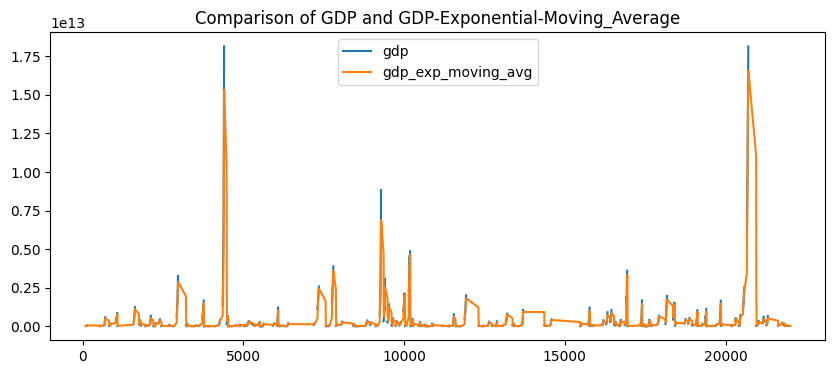

In [281]:
data[['gdp', 'gdp_exp_moving_avg']].plot(label='RELIANCE',figsize=(10, 4))
plt.title("Comparison of GDP and GDP-Exponential-Moving_Average")

The visualization leads us to conclude that the Exponential Moving Average effectively represents the original GDP values.

In [282]:
data['gdp'] = data['gdp'].mask(pd.isna(data['gdp']), data['gdp_exp_moving_avg'])

In [283]:
data.isna().sum()

country                    0
year                       0
iso_code                  37
population                 0
gdp                        0
                          ..
wind_electricity           0
wind_energy_per_capita     0
wind_share_elec            0
wind_share_energy          0
gdp_exp_moving_avg         0
Length: 130, dtype: int64

## Exploratory Data Analysis (EDA)

In [284]:
stacked_df = pd.DataFrame(data[["year","biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].loc[data['year'] >= 1974])

In [285]:
# Grouping the stacked_df
A = stacked_df.groupby('year')[["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].sum()

In [286]:
px.bar(A,A.index,["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"],
      title = "Increasing share of electricity generation by different methods across years" )


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Over the years, there has been a clear upward trend in electricity generation capacities, which may be attributed to the following factors:
1. Adoption of technology from more developed countries.
2. Increased focus on renewable energy sources, leading to these sudden spikes.

Additionally, the instances of sudden increases observed in the visualization could be due to inaccuracies in the data collection process.

In [287]:
B = data.groupby('year')[['fossil_share_energy','renewables_share_energy','nuclear_share_energy']].mean().reset_index()

In [288]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

frames = []
for year in range(1992, 2023):
    filtered_df = B[B['year'] == year]
    trace = go.Pie(
                labels=['Fossil', 'Renewable', 'Nuclear'],
                values=[filtered_df['fossil_share_energy'].values[0], filtered_df['renewables_share_energy'].values[0], filtered_df['nuclear_share_energy'].values[0]],
                textinfo='label+percent',hole=.3)
    fig.add_trace(trace)
    fig.update_traces(hoverinfo='label+percent', textfont_size=10,
                  marker=dict(line=dict(color='#000000', width=2)))    


fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
        label=str(1992 + i)
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
        title_text=f'Share of Electricity Generated',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

fig.show()

#### <span style="color:cyan"> An examination of the distribution over the years reveals a clear trend towards an increased focus and inclination for generating energy from renewable sources.</span>

In [289]:
def sparklines(ascending = False):

    D = pd.DataFrame(data[['electricity_generation','electricity_demand','year','country','energy_per_capita','population']])

    A = data.groupby('country')['population'].mean().reset_index().sort_values(by='population',ascending = ascending).head()['country'].to_list()

    D = D[(D.electricity_demand != 0) & (D.country.isin(A))]
    if ascending == False:
        fig = px.line(D,  x="year", y="energy_per_capita" ,facet_row="country",color='country',symbol="country", facet_row_spacing=0.01, height=500, width=1000, title = "Energy Per Capita of Top 5 countries population wise")
    else :
        fig = px.line(D,  x="year", y="energy_per_capita" ,facet_row="country",color='country',symbol="country", facet_row_spacing=0.01, height=500, width=1000, title = "Energy Per Capita of Bottom 5 countries population wise")
    # hide and lock down axes
#     fig.update_xaxes(visible=False, fixedrange=True)
    fig.update_yaxes(visible=True, fixedrange=True,nticks = 2, showgrid=False, zeroline=False,title=None)

    # remove facet/subplot labels
    fig.update_layout(annotations=[], overwrite=True)

    # strip down the rest of the plot
    fig.update_layout(
        showlegend=True,
        plot_bgcolor="black",
        margin=dict(t=35,l=10,b=10,r=10)
    )

    # disable the modebar for such a small plot
    fig.show(config=dict(displayModeBar=False))

In [290]:
sparklines()    

In [291]:
sparklines(True)    

#### Upon observing the y-axis positioning of the sparklines, a twofold difference in values is noted between the TOP-5 and BOTTOM-5. It can be concluded that countries with larger populations tend to have lower energy_per_capita, and conversely, countries with smaller populations exhibit higher energy_per_capita.

In [292]:
E = data[data['year']>=2000].groupby(['year','country'])[['electricity_demand','electricity_generation']].mean().reset_index()
E['ratio'] = E['electricity_generation']/E['electricity_demand']

In [293]:
E['electricity_demand'] = E['electricity_demand'].mask(E.electricity_demand == 0, 1)
E['electricity_demand'] = np.log(E['electricity_demand'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_demand <= 0 | E.electricity_demand.isna()), 0)


E['electricity_generation'] = E['electricity_generation'].mask(E.electricity_generation == 0, 1)
E['electricity_generation'] = np.log(E['electricity_generation'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_generation <= 0 | E.electricity_generation.isna()), 0)

In [294]:
# fig = px.scatter(E,x= 'electricity_demand', y = 'electricity_generation',color = "year")

fig = px.scatter(E,x = 'electricity_demand', y = 'electricity_generation',
                 animation_frame = 'country',color = 'year',title = 'Correlation between Electricity Generation and Demand',size = abs(E.electricity_generation),
                 hover_name="country",  labels={'y':'Electricity Demand in terawatt-hours'},
                range_x=[-1,E.electricity_demand.max()], range_y=[-2,E.electricity_generation.max()])
fig.update_yaxes(visible=True, zeroline=False)

fig.update_layout(
        showlegend=True,
        plot_bgcolor="black")

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### <span style = 'color:seagreen'> The visualization suggests that the demand and supply of electricity have been steadily increasing over the years. Interestingly, in more developed nations such as the USA, Canada, UK, and France, there hasn't been a significant surge in demand or generation capacity, with values remaining relatively stable over several years.<br><br>This pattern is also observed in smaller European countries like Norway, the Netherlands, North Macedonia, Serbia, and Luxembourg.<br><br>In contrast, countries with emerging economies, including India, China, Argentina, and Israel, have exhibited a sharp upward trend.</span>

In [295]:
F = data[data.year >= 2000].groupby('year')[['greenhouse_gas_emissions','fossil_electricity']].mean().reset_index()

In [296]:
g1 = go.Bar(x=F.year, y=F.fossil_electricity, name = "Fossil Electricity",  marker_color='goldenrod')
# Create a line chart
g2 = go.Bar(x=F.year, y=F.greenhouse_gas_emissions, name = "greenhouse_gas_emissions",marker_color='burlywood')

fig = go.Figure(data=[g1,g2])

fig.update_layout(barmode='relative',title_text = "Electricity Generated by Fossils & Emissions of Greenhouse Gas",
        showlegend=True,
        plot_bgcolor="black")
fig.show()

#### Inspite of many measures and regulations, the greenhouse gas emissions has relatively grown over the past couple of decades which suggests there is a need for shifting focus on more renewable sources for energy generation

In [297]:
G = data.groupby(['year','country']).renewables_share_elec.mean().reset_index()

In [298]:
fig = px.line(G,x='year',y='renewables_share_elec',animation_frame='country', color_discrete_sequence=['gold'], markers=True,
        title = "Year on Year growth in Share of electricity generated by renewables")

fig.update_layout(
        
        plot_bgcolor="black")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### With continuous advancements and focus of International groups and countries to promote renewable sources as the primary sources of energy, many countries are continuously increasing their focus to renewable sources for the energy securities of their respective states.

> we saw in the previous chart that greenhouse gas emission is still increasing inspite the fact that companies started to adapt more and more renewable sources for electricity generation. Hopefully if the trend continuous, maybe in a couple of decades, we can minimize this greenhouse gas emissions caused by electricity generation. 

Now, we have basic understanding of our data, so moving ahead, we should look at computing more complex tasks : 

## Classifying countries based on their energy security and self-sufficiency

- Target label: A categorical label representing different levels of energy self-sufficiency (e.g., "High Self-Sufficiency," "Moderate Self-Sufficiency," "Low Self-Sufficiency").
- Rationale: This classification task could help identify countries that are heavily reliant on energy imports and potential areas for increasing domestic energy production or diversification.

## Data Preprocessing 

In [299]:
px.line(data,x = 'year',y = 'net_elec_imports_share_demand',animation_frame = 'country')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [300]:
# Creating a ratio that gives us an estimate of how much energy is being primarily consumed divided by 
# the total of power produced from different sources at a time

data['energy_production_ratio'] = data.primary_energy_consumption / (data.coal_production + data.oil_production + data.gas_production + data.renewables_consumption + data.nuclear_consumption)

#### Columns like net_elec_imports_share_demand, energy_production_ratio, various types of energy production values, per_capita energy generation values can help in building a better model, hence we need to drop the rest of the columns and more closely observe features which are of greater significance for us.

In [301]:

ls = ['change_pct','change_twh','share_elec','_electricity',
      'carbon_intensity_elec','elec_per_capita','prod_per_capita','electricity_demand','electricity_generation',
     'energy_per_gdp','fossil_electricity','greenhouse_gas_emissions','other_renewable_exc_biofuel_electricity',
     'other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','iso_code',
     ]
unnec = []
for i in data.columns.unique():
    if i[-10:] in ls:
        unnec.append(i) 
    elif i[-12:] in ls:
        unnec.append(i)
    elif i[-15:] in ls or i in ls:
        unnec.append(i)
data1 = data.drop(unnec, axis = 1)

In [302]:
data1.head()

country  year  population           gdp  biofuel_cons_per_capita  \
97   Afghanistan  1974  11869881.0  1.430911e+10                      0.0   
98   Afghanistan  1975  12157390.0  1.517777e+10                      0.0   
99   Afghanistan  1976  12425276.0  1.602361e+10                      0.0   
100  Afghanistan  1977  12687308.0  1.520736e+10                      0.0   
101  Afghanistan  1978  12938864.0  1.633783e+10                      0.0   

     biofuel_consumption  biofuel_share_energy  coal_cons_per_capita  \
97                   0.0                   0.0                   0.0   
98                   0.0                   0.0                   0.0   
99                   0.0                   0.0                   0.0   
100                  0.0                   0.0                   0.0   
101                  0.0                   0.0                   0.0   

     coal_consumption  coal_production  ...  renewables_energy_per_capita  \
97                0.0            0.936  ...                           0.0   
98                0.0            1.221  ...                           0.0   
99                0.0            1.303  ...                           0.0   
100               0.0            1.384  ...                           0.0   
101               0.0            1.775  ...                           0.0   

     renewables_share_energy  solar_consumption  solar_energy_per_capita  \
97                       0.0                0.0                      0.0   
98                       0.0                0.0                      0.0   
99                       0.0                0.0                      0.0   
100                      0.0                0.0                      0.0   
101                      0.0                0.0                      0.0   

     solar_share_energy  wind_consumption  wind_energy_per_capita  \
97                  0.0               0.0                     0.0   
98                  0.0               0.0                     0.0   
99                  0.0               0.0                     0.0   
100                 0.0               0.0                     0.0   
101                 0.0               0.0                     0.0   

     wind_share_energy  gdp_exp_moving_avg  energy_production_ratio  
97                 0.0        1.430911e+10                      0.0  
98                 0.0        1.478687e+10                      0.0  
99                 0.0        1.528403e+10                      0.0  
100                0.0        1.525877e+10                      0.0  
101                0.0        1.556854e+10                      0.0  

[5 rows x 50 columns]

Our Energy-Production-Ratio contains many Null, infinity and -infinity values, so we need to replace those with more sensible values

In [303]:
data1.loc[data1['energy_production_ratio'].isin([np.nan, -np.inf]), 'energy_production_ratio'] = 0

# Replace positive infinity with the maximum value in the column
max_value = data1['energy_production_ratio'].replace([np.inf], np.nan).max()
data1.loc[data1['energy_production_ratio'] == np.inf, 'energy_production_ratio'] = max_value

In [304]:
data1[['net_elec_imports_share_demand','energy_production_ratio']].describe().T

count          mean           std      min  \
net_elec_imports_share_demand  7362.0      0.899984     34.558107 -844.207   
energy_production_ratio        7362.0  38860.209033  63108.594757    0.000   

                                    25%       50%       75%       max  
net_elec_imports_share_demand  0.000000  0.000000       0.0     100.0  
energy_production_ratio        0.871398  2.734804  141426.5  141426.5

In [305]:
data1.describe().T

count          mean           std  \
year                                7362.0  1.999239e+03  1.350272e+01   
population                          7362.0  3.876723e+07  1.343326e+08   
gdp                                 7362.0  4.158520e+11  1.392995e+12   
biofuel_cons_per_capita             7362.0  3.462662e+01  1.533920e+02   
biofuel_consumption                 7362.0  2.272374e+00  1.991147e+01   
biofuel_share_energy                7362.0  1.025569e-01  4.634996e-01   
coal_cons_per_capita                7362.0  2.851219e+03  6.414201e+03   
coal_consumption                    7362.0  1.972359e+02  1.240327e+03   
coal_production                     7362.0  2.017917e+02  1.227418e+03   
coal_share_energy                   7362.0  7.853304e+00  1.557704e+01   
electricity_share_energy            7362.0  5.524452e+00  7.272058e+00   
energy_per_capita                   7362.0  2.479382e+04  3.406158e+04   
fossil_energy_per_capita            7362.0  1.421855e+04  2.530182e+04   
fossil_fuel_consumption             7362.0  6.015053e+02  2.440327e+03   
fossil_share_energy                 7362.0  3.476536e+01  4.264186e+01   
gas_consumption                     7362.0  1.522026e+02  6.121935e+02   
gas_energy_per_capita               7362.0  5.796186e+03  1.800611e+04   
gas_production                      7362.0  1.547333e+02  6.673111e+02   
gas_share_energy                    7362.0  9.319155e+00  1.618402e+01   
hydro_consumption                   7362.0  4.636380e+01  1.852134e+02   
hydro_energy_per_capita             7362.0  2.084653e+03  9.024344e+03   
hydro_share_energy                  7362.0  3.832299e+00  9.116951e+00   
low_carbon_consumption              7362.0  9.811976e+01  3.951289e+02   
low_carbon_energy_per_capita        7362.0  3.380837e+03  1.130195e+04   
low_carbon_share_energy             7362.0  6.473434e+00  1.247538e+01   
net_elec_imports                    7362.0  4.279815e-02  7.441181e+00   
net_elec_imports_share_demand       7362.0  8.999840e-01  3.455811e+01   
nuclear_consumption                 7362.0  3.685949e+01  1.823994e+02   
nuclear_energy_per_capita           7362.0  8.648553e+02  2.771394e+03   
nuclear_share_energy                7362.0  1.794924e+00  5.428626e+00   
oil_consumption                     7362.0  2.610828e+02  9.337421e+02   
oil_energy_per_capita               7362.0  8.488761e+03  1.476734e+04   
oil_production                      7362.0  2.626979e+02  8.234216e+02   
oil_share_energy                    7362.0  1.759290e+01  2.350933e+01   
other_renewable_consumption         7362.0  5.040028e+00  2.403401e+01   
other_renewables_energy_per_capita  7362.0  2.579555e+02  1.986350e+03   
other_renewables_share_energy       7362.0  3.702004e-01  1.266126e+00   
primary_energy_consumption          7362.0  7.302036e+02  2.788643e+03   
renewables_consumption              7362.0  6.127126e+01  2.661741e+02   
renewables_energy_per_capita        7362.0  2.517150e+03  1.047604e+04   
renewables_share_energy             7362.0  4.678508e+00  1.013994e+01   
solar_consumption                   7362.0  2.178974e+00  2.527255e+01   
solar_energy_per_capita             7362.0  3.298585e+01  1.734530e+02   
solar_share_energy                  7362.0  8.600435e-02  4.452189e-01   
wind_consumption                    7362.0  5.437635e+00  5.269150e+01   
wind_energy_per_capita              7362.0  1.121144e+02  5.432133e+02   
wind_share_energy                   7362.0  2.874446e-01  1.395959e+00   
gdp_exp_moving_avg                  7362.0  3.989663e+11  1.267110e+12   
energy_production_ratio             7362.0  3.886021e+04  6.310859e+04   

                                             min           25%           50%  \
year                                1.974000e+03  1.988000e+03  2.000000e+03   
population                          6.531000e+04  3.655583e+06  9.523066e+06   
gdp                                 1.642060e+08  1.730363e+10  6.065213e+10   
biofuel_cons_per

<Axes: xlabel='net_elec_imports_share_demand'>

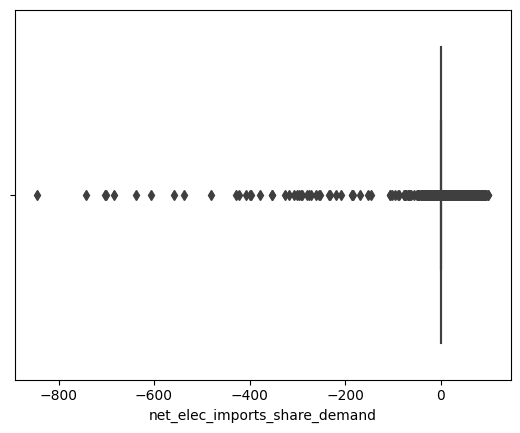

In [306]:
# To understand the distribution more clearly

sns.boxplot(x = data1['net_elec_imports_share_demand'])

There are way too many zero's in the dataset but it is quite understandable because many countries do not have enough resources or inhouse facilities to generate energy, or produce different kind of sources that are key for energy generation or might they are not very economically strong to setup plants for energy generation or are less technically advanced.

### Creating Target Label for Supervised Machine Learning

In [308]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer

In [309]:
# Creating a list called 'scaling' of all the columns of object(not numbers) data type excluding the year column

data1.select_dtypes(exclude = 'object').columns.to_list()

scaling = [] + data1.select_dtypes(exclude = 'object').columns.to_list()[1:]

In [310]:
# Pipeline object to demonstrate sequential processing

pipe = Pipeline([("minmaxscale",MinMaxScaler())])

# Column Transformers to apply a set of transformation to specifically mentioned columns parallely and concatenates the 
# transformed outputs from different transformations into a single matrix.

Ct = ColumnTransformer([('pipe',pipe,scaling),
                       ('ss',StandardScaler(),['year'])
                       ],remainder = 'passthrough',verbose_feature_names_out= False)

data1_transformed = Ct.fit_transform(data1)

In [311]:
cols = list(data1.columns.unique())[2:]
df1 = pd.DataFrame(data1_transformed,columns = cols + ['year','country'])

Our target will be significantly impacted by two columns:
1. Our self-generated column `energy_production_ratio`
2. `net_elec_imports_share_demand`

We need to establish a rationale for the values of these columns as they are inversely related. A higher value in the `energy_production_ratio` column indicates a country's self-sufficiency in energy production, while a higher value in the `net_elec_imports_share_demand` column suggests a dependency on external sources for a country's energy requirements.

For this task, let us look at different percentile values of both of these columns and try to establish a threshold so that class distribution can project the actual distribution of self-sufficiency of world countries.

In [312]:
for i in range(1,101):
    print(f"energy_production_ratio at percentile {i} is {(np.percentile(df1['energy_production_ratio'],i)):.7f}")

energy_production_ratio at percentile 1 is 0.0000000
energy_production_ratio at percentile 2 is 0.0000000
energy_production_ratio at percentile 3 is 0.0000000
energy_production_ratio at percentile 4 is 0.0000004
energy_production_ratio at percentile 5 is 0.0000006
energy_production_ratio at percentile 6 is 0.0000009
energy_production_ratio at percentile 7 is 0.0000012
energy_production_ratio at percentile 8 is 0.0000014
energy_production_ratio at percentile 9 is 0.0000015
energy_production_ratio at percentile 10 is 0.0000017
energy_production_ratio at percentile 11 is 0.0000019
energy_production_ratio at percentile 12 is 0.0000021
energy_production_ratio at percentile 13 is 0.0000024
energy_production_ratio at percentile 14 is 0.0000027
energy_production_ratio at percentile 15 is 0.0000029
energy_production_ratio at percentile 16 is 0.0000032
energy_production_ratio at percentile 17 is 0.0000034
energy_production_ratio at percentile 18 is 0.0000037
energy_production_ratio at percentile

In [315]:
for i in range(1,101):
    print(f"net_elec_imports_share_demand at percentile {i} is {(np.percentile(df1['net_elec_imports_share_demand'],i)):.9f}")

net_elec_imports_share_demand at percentile 1 is 0.855715315
net_elec_imports_share_demand at percentile 2 is 0.871643993
net_elec_imports_share_demand at percentile 3 is 0.877531421
net_elec_imports_share_demand at percentile 4 is 0.881011346
net_elec_imports_share_demand at percentile 5 is 0.883895798
net_elec_imports_share_demand at percentile 6 is 0.885714277
net_elec_imports_share_demand at percentile 7 is 0.887971282
net_elec_imports_share_demand at percentile 8 is 0.889432847
net_elec_imports_share_demand at percentile 9 is 0.890620881
net_elec_imports_share_demand at percentile 10 is 0.891689746
net_elec_imports_share_demand at percentile 11 is 0.892387527
net_elec_imports_share_demand at percentile 12 is 0.892917252
net_elec_imports_share_demand at percentile 13 is 0.893283697
net_elec_imports_share_demand at percentile 14 is 0.893614197
net_elec_imports_share_demand at percentile 15 is 0.893865169
net_elec_imports_share_demand at percentile 16 is 0.894008157
net_elec_imports_

In [316]:
df1[df1['net_elec_imports_share_demand']<=0.906130859][['energy_production_ratio','net_elec_imports_share_demand']].sort_values(by = ['energy_production_ratio','net_elec_imports_share_demand'],ascending = [False,True])

energy_production_ratio net_elec_imports_share_demand
5269                     1.0                           0.0
5272                     1.0                      0.108382
5273                     1.0                      0.149253
5271                     1.0                      0.151662
5270                     1.0                      0.170656
...                      ...                           ...
5830                     0.0                      0.901243
5811                     0.0                      0.902066
2157                     0.0                      0.902533
5808                     0.0                       0.90321
5809                     0.0                      0.905778

[6625 rows x 2 columns]

Choosing `energy_production_ratio`

1. Value at 65th Percentile seems Optimal 0.0000842 for Higher Efficiency Class as it contains 2577 entries
2. Value at 40th Percentile seems Optimal 0.0000120 for Lower Efficiency Class as it contains 2949 entries

Choosing `net_elec_imports_share_demand`
1. Value at Percentile 50 seems Optimal 0.894091 for both Lower & Higher Efficiency Class as it encapsulates majority of the values

In [317]:
# Creating Target Column

df1['target'] = 'Unknown'

# High Self-Sufficiency
mask = ((df1['net_elec_imports_share_demand'] <= 0.894) & (df1['energy_production_ratio'] >= 0.0000842))
df1.loc[mask, 'target'] = 'High Self-Sufficiency'

# Moderate Self-Sufficiency
mask = (df1['net_elec_imports_share_demand'].between(0.894,1)) & (df1['energy_production_ratio'].between(0.0000120,1))
df1.loc[mask, 'target'] = 'Moderate Self-Sufficiency'

# Low Self-Sufficiency
mask = (df1['net_elec_imports_share_demand'] > 0.894090) & (df1['energy_production_ratio'] <= 0.0000120)
df1.loc[mask, 'target'] = 'Low Self-Sufficiency'

In [318]:
df1[df1.target == 'Unknown'][['energy_production_ratio','net_elec_imports_share_demand','target']].sort_values(['energy_production_ratio','net_elec_imports_share_demand'],ascending = [False,True])

energy_production_ratio net_elec_imports_share_demand   target
4107                0.000082                      0.893301  Unknown
2735                0.000079                      0.888894  Unknown
5463                0.000078                      0.891925  Unknown
2630                0.000077                      0.892389  Unknown
2734                0.000076                      0.891062  Unknown
...                      ...                           ...      ...
5801                     0.0                      0.890434  Unknown
6704                     0.0                      0.890973  Unknown
5803                     0.0                      0.892758  Unknown
5800                     0.0                      0.892841  Unknown
5812                     0.0                      0.893317  Unknown

[894 rows x 3 columns]

In [319]:
# There are still many Unknowns, lets check the distribution

df1.target.value_counts()

target
Moderate Self-Sufficiency    3753
Low Self-Sufficiency         2402
Unknown                       894
High Self-Sufficiency         313
Name: count, dtype: int64

In [320]:
from sklearn.preprocessing import OrdinalEncoder

In [321]:
# Using OrdinalEncoder,converting labels into numbers and then using KNNImputer which uses k-nearest neighbours approach to fill missing values in dataset

pipe2 = Pipeline([('ord',OrdinalEncoder()),
                 ('knn',KNNImputer(missing_values=3,n_neighbors= 5, weights='distance'))
                 ])

df1.target = pipe2.fit_transform(np.array(df1.target).reshape(-1,1))

In [322]:
df1.target.value_counts()

target
2.000000    3753
1.000000    2402
1.531849     894
0.000000     313
Name: count, dtype: int64

In [323]:
# Seems like unknown values are closer to low self sufficiency values, hence mapping them to same 

df1.loc[~df1.target.isin([0,1,2]),'target'] = (df1.loc[~df1.target.isin([0,1,2]),'target']).astype(int)
df1.target.value_counts()

target
2.0    3753
1.0    3296
0.0     313
Name: count, dtype: int64

In [324]:
df1.head()

population       gdp biofuel_cons_per_capita biofuel_consumption  \
0   0.008279  0.000779                     0.0                 0.0   
1   0.008481  0.000827                     0.0                 0.0   
2   0.008669  0.000874                     0.0                 0.0   
3   0.008852  0.000829                     0.0                 0.0   
4   0.009029  0.000891                     0.0                 0.0   

  biofuel_share_energy coal_cons_per_capita coal_consumption coal_production  \
0                  0.0                  0.0              0.0        0.000037   
1                  0.0                  0.0              0.0        0.000048   
2                  0.0                  0.0              0.0        0.000051   
3                  0.0                  0.0              0.0        0.000054   
4                  0.0                  0.0              0.0        0.000069   

  coal_share_energy electricity_share_energy  ... solar_energy_per_capita  \
0               0.0                      0.0  ...                     0.0   
1               0.0                      0.0  ...                     0.0   
2               0.0                      0.0  ...                     0.0   
3               0.0                      0.0  ...                     0.0   
4               0.0                      0.0  ...                     0.0   

  solar_share_energy wind_consumption wind_energy_per_capita  \
0                0.0              0.0                    0.0   
1                0.0              0.0                    0.0   
2                0.0              0.0                    0.0   
3                0.0              0.0                    0.0   
4                0.0              0.0                    0.0   

  wind_share_energy gdp_exp_moving_avg energy_production_ratio      year  \
0               0.0           0.000845                     0.0 -1.869331   
1               0.0           0.000874                     0.0 -1.795267   
2               0.0           0.000904                     0.0 -1.721203   
3               0.0           0.000902                     0.0 -1.647139   
4               0.0           0.000921                     0.0 -1.573075   

       country target  
0  Afghanistan    1.0  
1  Afghanistan    1.0  
2  Afghanistan    1.0  
3  Afghanistan    1.0  
4  Afghanistan    1.0  

[5 rows x 51 columns]

In [325]:
# Since the model will only accept numeric values in label, we will use label encoder to encode every class to a specific number
# For Example 
# Moderate Self-Sufficiency - > 2
# Low Self-Sufficiency - > 1 
# High Self-Sufficiency -> 0

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.country = le.fit_transform(df1.country)

In [364]:
# Although the target label is now encoded, it creates a sort of order which when an algorithm is getting trained, will consider as actual values
# To overcome this challenge, we use One-Hot Vectors which creates an array of size corresponding to the number of classes with value 1 for actual class and 0 for rest
# For Example = 
# 1 - > [1,0,0]
# 2 - > [0,1,0]
# 3 - > [0,0,1]
ohe = OneHotEncoder()

df1.country = ohe.fit_transform(np.array(df1.country).reshape(-1,1))

In [365]:
df1.country = df1.country.toarray()

In [328]:
# Using StratifiedShuffleSplit to split the data based on the distribution of target label into train set and test set

split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state = 42)
for train_index,test_index in split.split(np.zeros(len(data)),df1.target):
    train_set = df1.loc[train_index]
    test_set = df1.loc[test_index]

In [329]:
# Spliting train data into train data's features and labels

xtrain,ytrain = train_set.drop('target',axis = 1),train_set.target

In [330]:
# Spliting test data into test data's features and labels

xtest,ytest = test_set.drop('target',axis = 1),test_set.target

## Data Modelling

In [331]:
# Using Logistic regression with cross validation to get the best score possible

logics = LogisticRegression(random_state = 42,multi_class='multinomial',max_iter=1000)

cv_logics= cross_validate(logics,xtrain,ytrain,cv = 5, scoring=['precision_micro', 'recall_micro', 'f1_micro'],  # have used micro because my target label is a multiclass onehot vector
                            return_train_score=True,
                            return_estimator=True)
cv_logics

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/

{'fit_time': array([2.50398779, 2.66867638, 2.53562832, 2.66488051, 2.49196672]),
 'score_time': array([0.0400691 , 0.04507565, 0.04206467, 0.04106307, 0.04018736]),
 'estimator': [LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
  LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
  LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
  LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
  LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)],
 'test_precision_micro': array([0.78552036, 0.79528986, 0.81884058, 0.81431159, 0.82065217]),
 'train_precision_micro': array([0.8125    , 0.80620331, 0.81208965, 0.8073353 , 0.80461852]),
 'test_recall_micro': array([0.78552036, 0.79528986, 0.81884058, 0.81431159, 0.82065217]),
 'train_recall_micro': array([0.8125    , 0.80620331, 0.81208965, 0.8073353 , 0.80461852]),
 'test_f1_micro': array([0.78552036, 0.7952

In [332]:
# Getting mean scores

for i,j in cv_logics.items():
    if type(j)== np.ndarray:
        print(f"{i} Mean is {np.mean(j):.4f}")

fit_time Mean is 2.5730
score_time Mean is 0.0417
test_precision_micro Mean is 0.8069
train_precision_micro Mean is 0.8085
test_recall_micro Mean is 0.8069
train_recall_micro Mean is 0.8085
test_f1_micro Mean is 0.8069
train_f1_micro Mean is 0.8085


In [333]:
# Hyperparameter Tuning of Logistic Regression

grid = {'max_iter' : [100,1000,10000],
        'tol' : [1e-4,1e-3,1e-5],
        'penalty' : ['l1','l2','elasticnet']
    }

grid_logics = GridSearchCV(logics,param_grid = grid,scoring = 'f1_micro',cv = 5, n_jobs = -1) # have used micro because my label is a multiclass onehot vector

grid_logics.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='f1_micro')

In [334]:
best_log = grid_logics.best_estimator_    # To get the model with best parameters
best_log.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [335]:
# Getting Scores on train and test sets

print(best_log.score(xtrain,ytrain))
print(best_log.score(xtest,ytest))

0.8147074805288897
0.8164041281912005


In [336]:
from sklearn.metrics import f1_score

f1_score(ytest,best_log.predict(xtest),average = 'micro')

0.8164041281912005

## Let's Try Feature Engineering that might help yield better results

In [337]:
from sklearn.feature_selection import RFE

selector = RFE(best_log, n_features_to_select = 25, step=1)
xnew = xtrain
selector = selector.fit(xnew, ytrain)
print(f'Rank of each feature is : {selector.ranking_}')

Rank of each feature is : [ 1  2  8  1  9  1 14  1  1 25  1 13 12 19  4  1  1  1 22 18  1 23  1  1
  1  1  5  1  1  1  1  1  1 20  1  1 11 21 10  1 24 15  6 17  1 16  7  1
  3 26]


In [338]:
x_new = selector.transform(xtrain)
best_log.fit(x_new,ytrain)
print(best_log.score(x_new,ytrain))

0.809998188733925


That did not help much, let's try another method, RFECV, it will automatically decide the number of features to choose for modelling

### <span style = 'color:red'>The below code might take some time to process </span>

In [339]:
from sklearn.feature_selection import RFECV

selector = RFECV(best_log, step=1)
xnew = xtrain
selector = selector.fit(xnew, ytrain)

In [343]:
print(f'Rank of each feature is : {selector.ranking_}')
print(f"No of features selected for modeling are : {len(list(filter(lambda x: x + 1 if x == 1 else False ,selector.ranking_)))}")
x_new = selector.transform(xtrain)
best_log.fit(x_new,ytrain)
print(best_log.score(x_new,ytrain))

Rank of each feature is : [ 1  9 15  6 16  1 21  1  2 32  1 20 19 26 11  1  1  4 29 25  1 30  7  1
  1  1 12  8  1  1  1  1  3 27  1  1 18 28 17  5 31 22 13 24  1 23 14  1
 10 33]
No of features selected for modeling are : 18
0.8152508603513856


### <span style = 'color:red'>The below code might take some time to process </span>

In [345]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
skb = SelectKBest(mutual_info_regression, k = 18)  # Choosing 18 since RFECV gave us 18 columns that suits best
xnew = xtrain
X_new_transformed = skb.fit_transform(xnew,ytrain)

print(f'Shape of of feature matrix after feature selection:{X_new_transformed.shape}')

best_log.fit(X_new_transformed,ytrain)
print(best_log.score(X_new_transformed,ytrain))

Shape of of feature matrix after feature selection:(5521, 18)
0.8152508603513856


We do not see much significant improvements with feature engineering, hence I will proceed with our original number of features only

In [348]:
# before proceeding, we need to fit the best estimator on original xtrain, so that it remembers weights for original xtrain and retains its shape

best_log.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [349]:
# To check key metrics of our model

from sklearn.metrics import classification_report
print(classification_report(ytest,best_log.predict(xtest)))

              precision    recall  f1-score   support

         0.0       1.00      0.09      0.16        78
         1.0       0.76      0.95      0.85       824
         2.0       0.88      0.76      0.82       939

    accuracy                           0.82      1841
   macro avg       0.88      0.60      0.61      1841
weighted avg       0.83      0.82      0.80      1841



Our model is not have the best of predictions, hence we need to keep trying, but before that, we should visualize the results using Confusion Matrix for better understanding of count of True_Positives, True_Negatives, False_Positives and False_Negatives

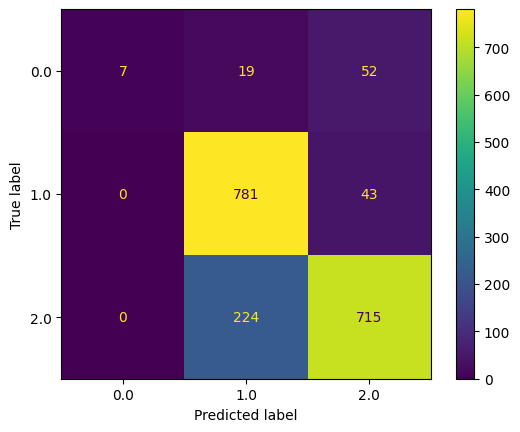

In [350]:
ConfusionMatrixDisplay.from_predictions(ytest,best_log.predict(xtest))

### Let's try a better Algorithm "Random Forest"

In [351]:
rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [352]:
rf.score(xtrain,ytrain)

1.0

Amazing Accuracy on the training set by the base RandomForest model

In [353]:
ypred_test = rf.predict(xtest)
f1_score(ytest,ypred_test,average = 'micro')

0.9961977186311787

In [354]:
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        78
         1.0       1.00      1.00      1.00       824
         2.0       1.00      1.00      1.00       939

    accuracy                           1.00      1841
   macro avg       0.99      1.00      0.99      1841
weighted avg       1.00      1.00      1.00      1841



Great f1 score as well on the test set

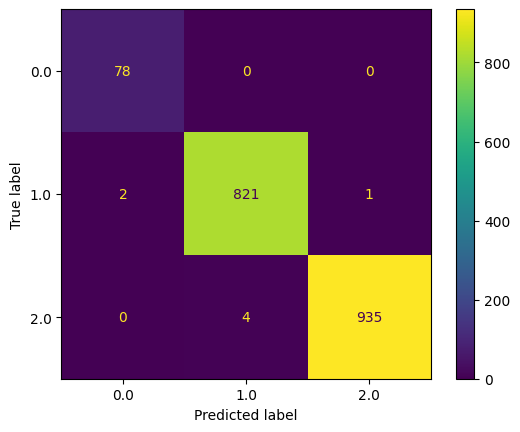

In [355]:
ConfusionMatrixDisplay.from_estimator(rf,xtest,ytest)

Probably the best algorithm for our use case, giving great results even on unseen dataset as well

**But for the fun of it, let's try another one**

In [356]:
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [357]:
estimators = [
    ('knn',KNeighborsClassifier(n_neighbors=5, weights='uniform',n_jobs =-1)),
    ("gbr",GradientBoostingClassifier(random_state = 42,)),
    ('dt',DecisionTreeClassifier())
]
voter = VotingClassifier(estimators=estimators,n_jobs = -1)

voter.fit(xtrain,ytrain)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_jobs=-1)),
                             ('gbr',
                              GradientBoostingClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier())],
                 n_jobs=-1)

### `Voting combines predictions from multiple models by either averaging (soft voting) or majority voting (hard voting).`

In [358]:
voter.score(xtrain,ytrain)

1.0

Amazing Accuracy received from voting classifier as well

In [359]:
ypred_test = voter.predict(xtest)
f1_score(ytest,ypred_test,average = 'micro')

0.997827267789245

In [360]:
print(classification_report(ytest,voter.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        78
         1.0       1.00      1.00      1.00       824
         2.0       1.00      1.00      1.00       939

    accuracy                           1.00      1841
   macro avg       0.99      1.00      1.00      1841
weighted avg       1.00      1.00      1.00      1841



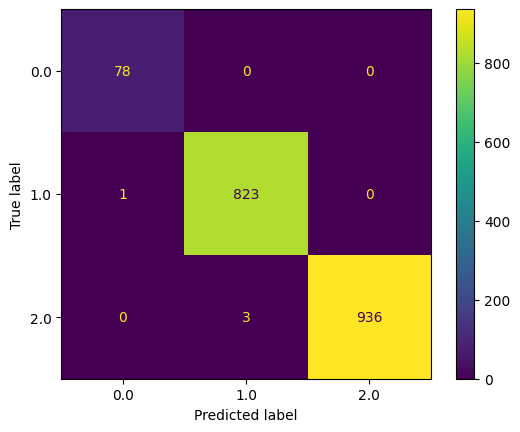

In [361]:
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [362]:
pd.DataFrame({'Model' : ["LogisticRegression", "RandomForestClassifier", "VotingClassifier"],
              "Train Score " : [best_log.score(xtrain,ytrain),rf.score(xtrain,ytrain),voter.score(xtrain,ytrain)],
              "Test Score" : [best_log.score(xtest,ytest),rf.score(xtest,ytest),voter.score(xtest,ytest)]}).sort_values(by=['Test Score'],ascending = False)

Model  Train Score   Test Score
2        VotingClassifier      1.000000    0.997827
1  RandomForestClassifier      1.000000    0.996198
0      LogisticRegression      0.814707    0.816404